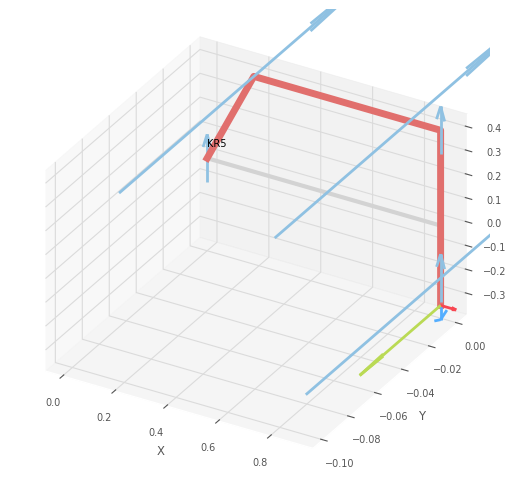

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KR5')

<Figure size 640x480 with 0 Axes>

In [2]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from spatialmath import SE3
import roboticstoolbox as rtb
from roboticstoolbox.models.DH import Puma560  # or your robot
from scipy.integrate import odeint

%matplotlib inline


# Initialize robot
robot = rtb.models.DH.KR5()
# Visualize initial config
robot.plot(robot.q, backend="pyplot", block=False)


In [3]:
#Setting the link masses
robot.links[0].m = 6.5  # Modify mass of first link
robot.links[0].m = 6.5
robot.links[1].m = 6
robot.links[2].m = 3
robot.links[3].m = 2.5
robot.links[4].m = 1.5
robot.links[5].m = 1



In [4]:
# === Center of mass for each link in the local frame (adjusted slightly from original) ===
robot.links[0].r = [0, -0.03, 0.09]     # Shifted slightly more in y and z
robot.links[1].r = [0, 0.09, 0.01]      # Slightly reduced y, added small z component
robot.links[2].r = [0, 0, 0.045]        # Slightly shorter offset
robot.links[3].r = [0, 0, 0.035]        # Small adjustment for mass center
robot.links[4].r = [0, 0, 0.025]        # Slightly longer than before
robot.links[5].r = [0, 0, 0.012]        # Small extension to make model unique

# === Inertia tensors (Ix, Iy, Iz, Ixy, Ixz, Iyz) in local frame ===
robot.links[0].I = [0.09, 0.07, 0.045, 0, 0, 0]
robot.links[1].I = [0.075, 0.065, 0.038, 0, 0, 0]
robot.links[2].I = [0.018, 0.018, 0.009, 0, 0, 0]
robot.links[3].I = [0.013, 0.0013, 0.009, 0, 0, 0]
robot.links[4].I = [0.009, 0.009, 0.0045, 0, 0, 0]
robot.links[5].I = [0.0045, 0.0045, 0.0025, 0, 0, 0]

# === Motor inertia (Jm)  ===
robot.links[0].Jm = 0.00038
robot.links[1].Jm = 0.00041
robot.links[2].Jm = 0.00036
robot.links[3].Jm = 0.00003
robot.links[4].Jm = 0.000035
robot.links[5].Jm = 0.000031

# === Viscous friction coefficient at the motor shaft (B)  ===
robot.links[0].B = 0.0014
robot.links[1].B = 0.00095
robot.links[2].B = 0.00125
robot.links[3].B = 0.00007
robot.links[4].B = 0.000085
robot.links[5].B = 0.000034

# === Coulomb friction (positive and negative direction)  ===
robot.links[0].Tc = [0.385, -0.425]
robot.links[1].Tc = [0.121, -0.068]
robot.links[2].Tc = [0.128, -0.101]
robot.links[3].Tc = [0.0108, -0.0164]
robot.links[4].Tc = [0.0089, -0.0141]
robot.links[5].Tc = [0.0036, -0.0099]

# === Gear ratios (G)  ===
robot.links[0].G = 60.1
robot.links[1].G = 105.2
robot.links[2].G = 51.7
robot.links[3].G = 74.0
robot.links[4].G = 70.2
robot.links[5].G = 75.3

# === Joint limits (min and max joint angles in radians)  ===
robot.links[0].qlim = [-2.75, 2.75]            # Slightly tighter limits
robot.links[1].qlim = [-1.9, 1.9]
robot.links[2].qlim = [0, 0.14]                # Slightly shortened prismatic range
robot.links[3].qlim = [-4.6, 4.6]
robot.links[4].qlim = [-2.05, 2.05]
robot.links[5].qlim = [-6.2, 6.2]


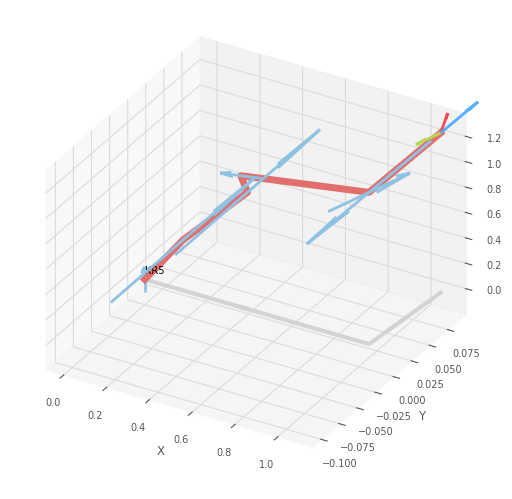

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KR5')

<Figure size 640x480 with 0 Axes>

In [5]:
q_start = [0, -pi/3, -pi/4, pi/3, -pi/3, 0]  # desired start pose
#q_start = [ pi/6, pi/4, -pi/4, pi/4, -pi/3, pi]
robot.qz = q_start
robot.plot(robot.qz, backend="pyplot", block=False)


In [6]:
import sys
import os

# Add the parent directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level
sys.path.append(project_root)
from vission.detector import get_barcode

YOLOv5  2025-5-28 Python-3.8.10 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
pixel_center = get_barcode()  # returns ((x, y), "corners")
print("Pixel center:", pixel_center[0])


C:\Users\Admin\Desktop\Robotics2\Motion Planning\project\robot_path_planner\model\yolov5\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin\Desktop\Robotics2\Motion Planning\project\robot_path_planner\model\yolov5\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin\Desktop\Robotics2\Motion Planning\project\robot_path_planner\model\yolov5\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin\Desktop\Robotics2\Motion Planning\project\robot_path_planner\model\yolov5\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

Best qrcode center: (145, 352) (Conf: 0.64)
Pixel center: (145, 352)


In [8]:
scale = 0.001  # 1 pixel = 1mm
offset = np.array([320, 240])  # image center (camera calibrated)

# Calculate displacement from center
diff = (np.array(pixel_center[0]) - offset) * scale

# Map to world coordinates, Z = 0.2m
target_world = SE3(0.5 + diff[0], diff[1], 0.2)
print("Target Pose (World):", target_world)


Target Pose (World):    1         0         0         0.325     
   0         1         0         0.112     
   0         0         1         0.2       
   0         0         0         1         



CONTROLLER

In [36]:

def control_function(q_current, t, robot, traj, Kp, Ki, Kd):
    # Find desired state at current time
    idx = np.argmin(np.abs(traj.t - t))
    q_d = traj.q[idx]
    qd_d = traj.qd[idx]
    
    # Calculate errors
    q_error = q_d - q_current[:6]
    qd_error = qd_d - q_current[6:12]
    
    # Update integral term (with anti-windup)
    q_int = q_current[12:] + q_error * (t - traj.t[max(0, idx-1)])  # Delta t
    
    # Anti-windup: Clamp integral term
    q_int = np.clip(q_int, -1.0, 1.0)  # Adjust limits as needed
    
    # PID control law
    tau_pid = Kp @ q_error + Ki @ q_int + Kd @ qd_error
    
    # Feedforward torque (inverse dynamics)
    qdd_d = traj.qdd[idx]
    tau_ff = robot.rne(q_d, qd_d, qdd_d)
    
    # Total torque
    tau = tau_ff + tau_pid
    
    # Robot dynamics
    M = robot.inertia(q_current[:6])
    C = robot.coriolis(q_current[:6], q_current[6:12])
    G = robot.gravload(q_current[:6])
    
    qdd = np.linalg.inv(M) @ (tau - C @ q_current[6:12] - G)
    
    return np.concatenate((q_current[6:12], qdd, q_error))  # Return derivatives (qd, qdd, q_int_dot)

Solving inverse kinematics (IK) using the Levenberg–Marquardt algorithm

In [37]:
%matplotlib inline
# Solve inverse kinematics to reach target
solution = robot.ikine_LM(target_world)
if not solution.success:
    print("IK failed to converge!")
q_end =solution.q
# Time parameters
N = 100
t_start = 0
t_stop = 7
time = np.linspace(t_start, t_stop, N)
# Generate trajectory (using quintic polynomial from Lab 2)
trajectory = rtb.mtraj(rtb.quintic, q_start, q_end, time)


PD (Proportional-Derivative) control

In [38]:

# PD Controller Parameters
Kp = np.diag([200, 160, 100, 60, 60, 60])  # Proportional gains
Ki = np.diag([10, 8, 5, 3, 3, 3])          # Integral gains (new)
Kd = np.diag([100, 80, 50, 20, 20, 20])    # Derivative gains

# Initial state (position and velocity)
q0 = np.concatenate((q_start, np.zeros(6), np.zeros(6)))  # q, qd, q_int

# Simulate the system
solution = odeint(control_function, 
                 np.concatenate((q_start, np.zeros(6), np.zeros(6))),  # Initial state: q, qd, q_int
                 time, 
                 args=(robot, trajectory, Kp, Ki, Kd))
q_sim = solution[:, :6]     # Joint positions
qd_sim = solution[:, 6:12]   # Joint velocities
q_int = solution[:, 12:]     # Integral terms (for debugging)


Compute end-effector trajectory from desired trajectory(planned)
~from the robot’s current position to the desired QR code.

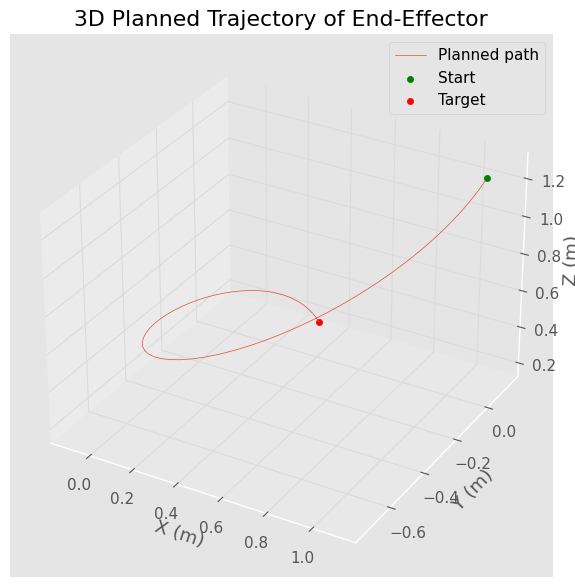

Animating robot motion using simulated PD controller result...


In [39]:

ee_positions = np.array([robot.fkine(q).t for q in trajectory.q])

# Plot 3D end-effector path from planned trajectory
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ee_positions[:, 0], ee_positions[:, 1], ee_positions[:, 2], label='Planned path')
ax.scatter(ee_positions[0, 0], ee_positions[0, 1], ee_positions[0, 2], c='green', label='Start')
ax.scatter(ee_positions[-1, 0], ee_positions[-1, 1], ee_positions[-1, 2], c='red', label='Target')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Planned Trajectory of End-Effector')
ax.legend()
plt.tight_layout()
plt.show()

# === Animate the Simulated Motion ===
print("Animating robot motion using simulated PD controller result...")


Compare planned  Vs simulated end effector path

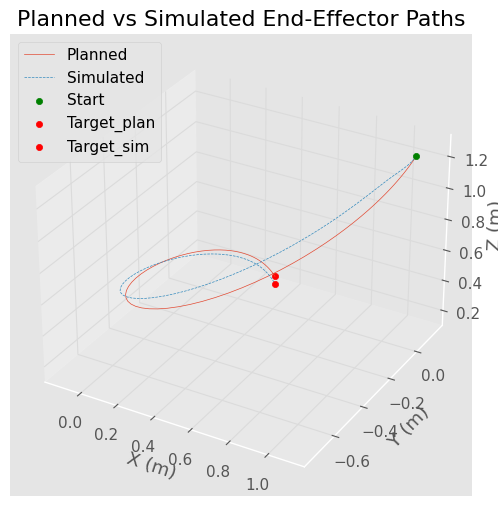

In [42]:
ee_sim_positions = np.array([robot.fkine(q).t for q in q_sim])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ee_positions[:, 0], ee_positions[:, 1], ee_positions[:, 2], label='Planned')
ax.plot(ee_sim_positions[:, 0], ee_sim_positions[:, 1], ee_sim_positions[:, 2], label='Simulated', linestyle='--')
ax.scatter(ee_positions[0, 0], ee_positions[0, 1], ee_positions[0, 2], c='green', label='Start')
ax.scatter(ee_positions[-1, 0], ee_positions[-1, 1], ee_positions[-1, 2], c='red', label='Target_plan')
ax.scatter(ee_sim_positions[-1, 0], ee_sim_positions[-1, 1], ee_sim_positions[-1, 2], c='red', label='Target_sim')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Planned vs Simulated End-Effector Paths')
ax.legend()
plt.show()

In [14]:
print(trajectory.q)

[[ 4.4385e-16     -1.0472     -0.7854      1.0472     -1.0472  4.6563e-16]
 [ 2.7352e-05     -1.0471    -0.78524      1.0469     -1.0473  2.7352e-05]
 [ 0.00021208     -1.0467    -0.78414      1.0445      -1.048  0.00021208]
 [  0.0006934     -1.0456    -0.78129      1.0384     -1.0497   0.0006934]
 [  0.0015915     -1.0435    -0.77598      1.0271     -1.0529   0.0015915]
 [  0.0030084     -1.0402    -0.76759      1.0092      -1.058   0.0030084]
 [  0.0050287     -1.0355    -0.75563     0.98373     -1.0652   0.0050287]
 [  0.0077207     -1.0292    -0.73969     0.94975     -1.0748   0.0077207]
 [   0.011137     -1.0212    -0.71947     0.90663     -1.0871    0.011137]
 [   0.015315     -1.0115    -0.69473      0.8539      -1.102    0.015315]
 [   0.020278     -0.9999    -0.66535     0.79125     -1.1198    0.020278]
 [   0.026038    -0.98647    -0.63125     0.71855     -1.1404    0.026038]
 [   0.032592    -0.97118    -0.59245     0.63583     -1.1639    0.032592]
 [   0.039928    -0.95407

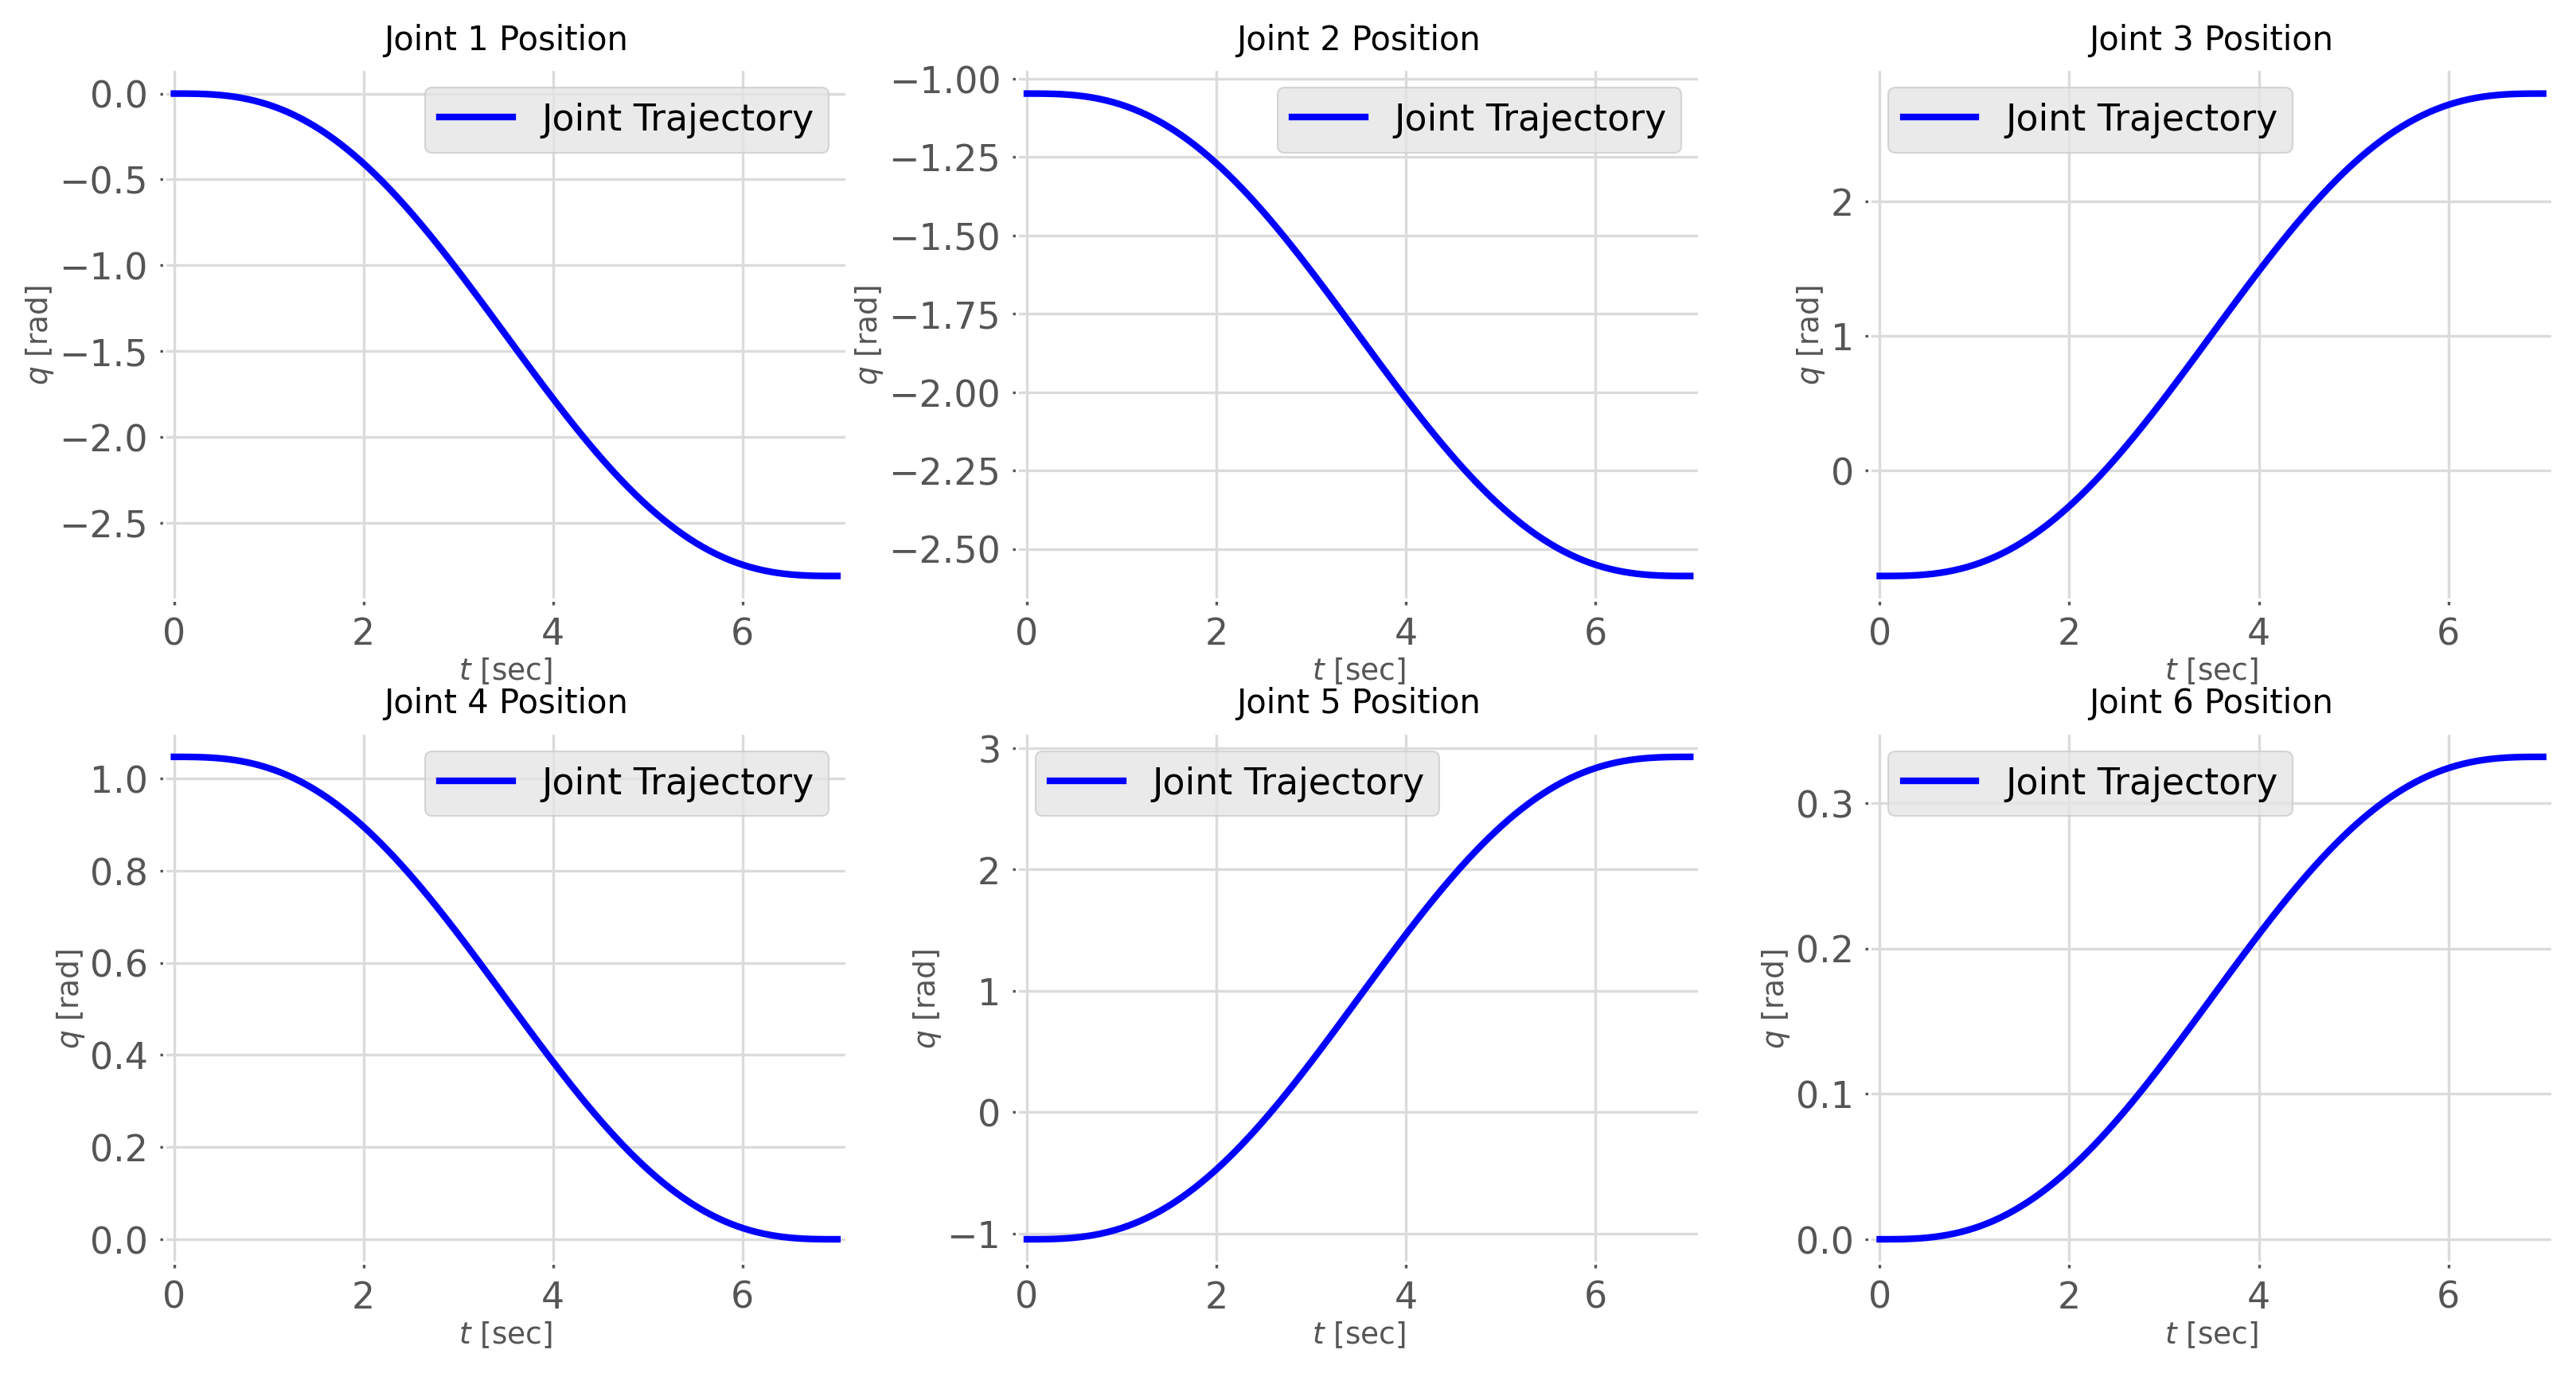

In [43]:
import matplotlib.pyplot as plt

# Time vector (assuming 50 steps equally spaced)
time = trajectory.t
t_start = time[0]
t_stop = time[-1]

plt.figure(figsize=(10, 5), dpi=300)  # Wide, high-res figure

for g in range(1, 7):  # Loop through joints 1 to 6
    plt.subplot(2, 3, g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)

    # Extract joint g trajectory from trajectory.q
    joint_trajectory = [trajectory.q[i][g-1] for i in range(len(trajectory.q))]

    # Plot the trajectory
    plt.plot(time, joint_trajectory, linestyle='-', linewidth=2, color='blue', label="Joint Trajectory")

    # Titles and labels
    plt.title(f"Joint {g} Position", fontsize=10)
    plt.ylabel(r"$q$ [rad]", fontsize=9)
    plt.xlabel(r"$t$ [sec]", fontsize=9)
    plt.grid(True)
    plt.legend()

    # Axis styling
    ax = plt.gca()
    ax.set_facecolor((1, 1, 1))
    ax.set_xlim([t_start - 0.1, t_stop + 0.1])

plt.show()


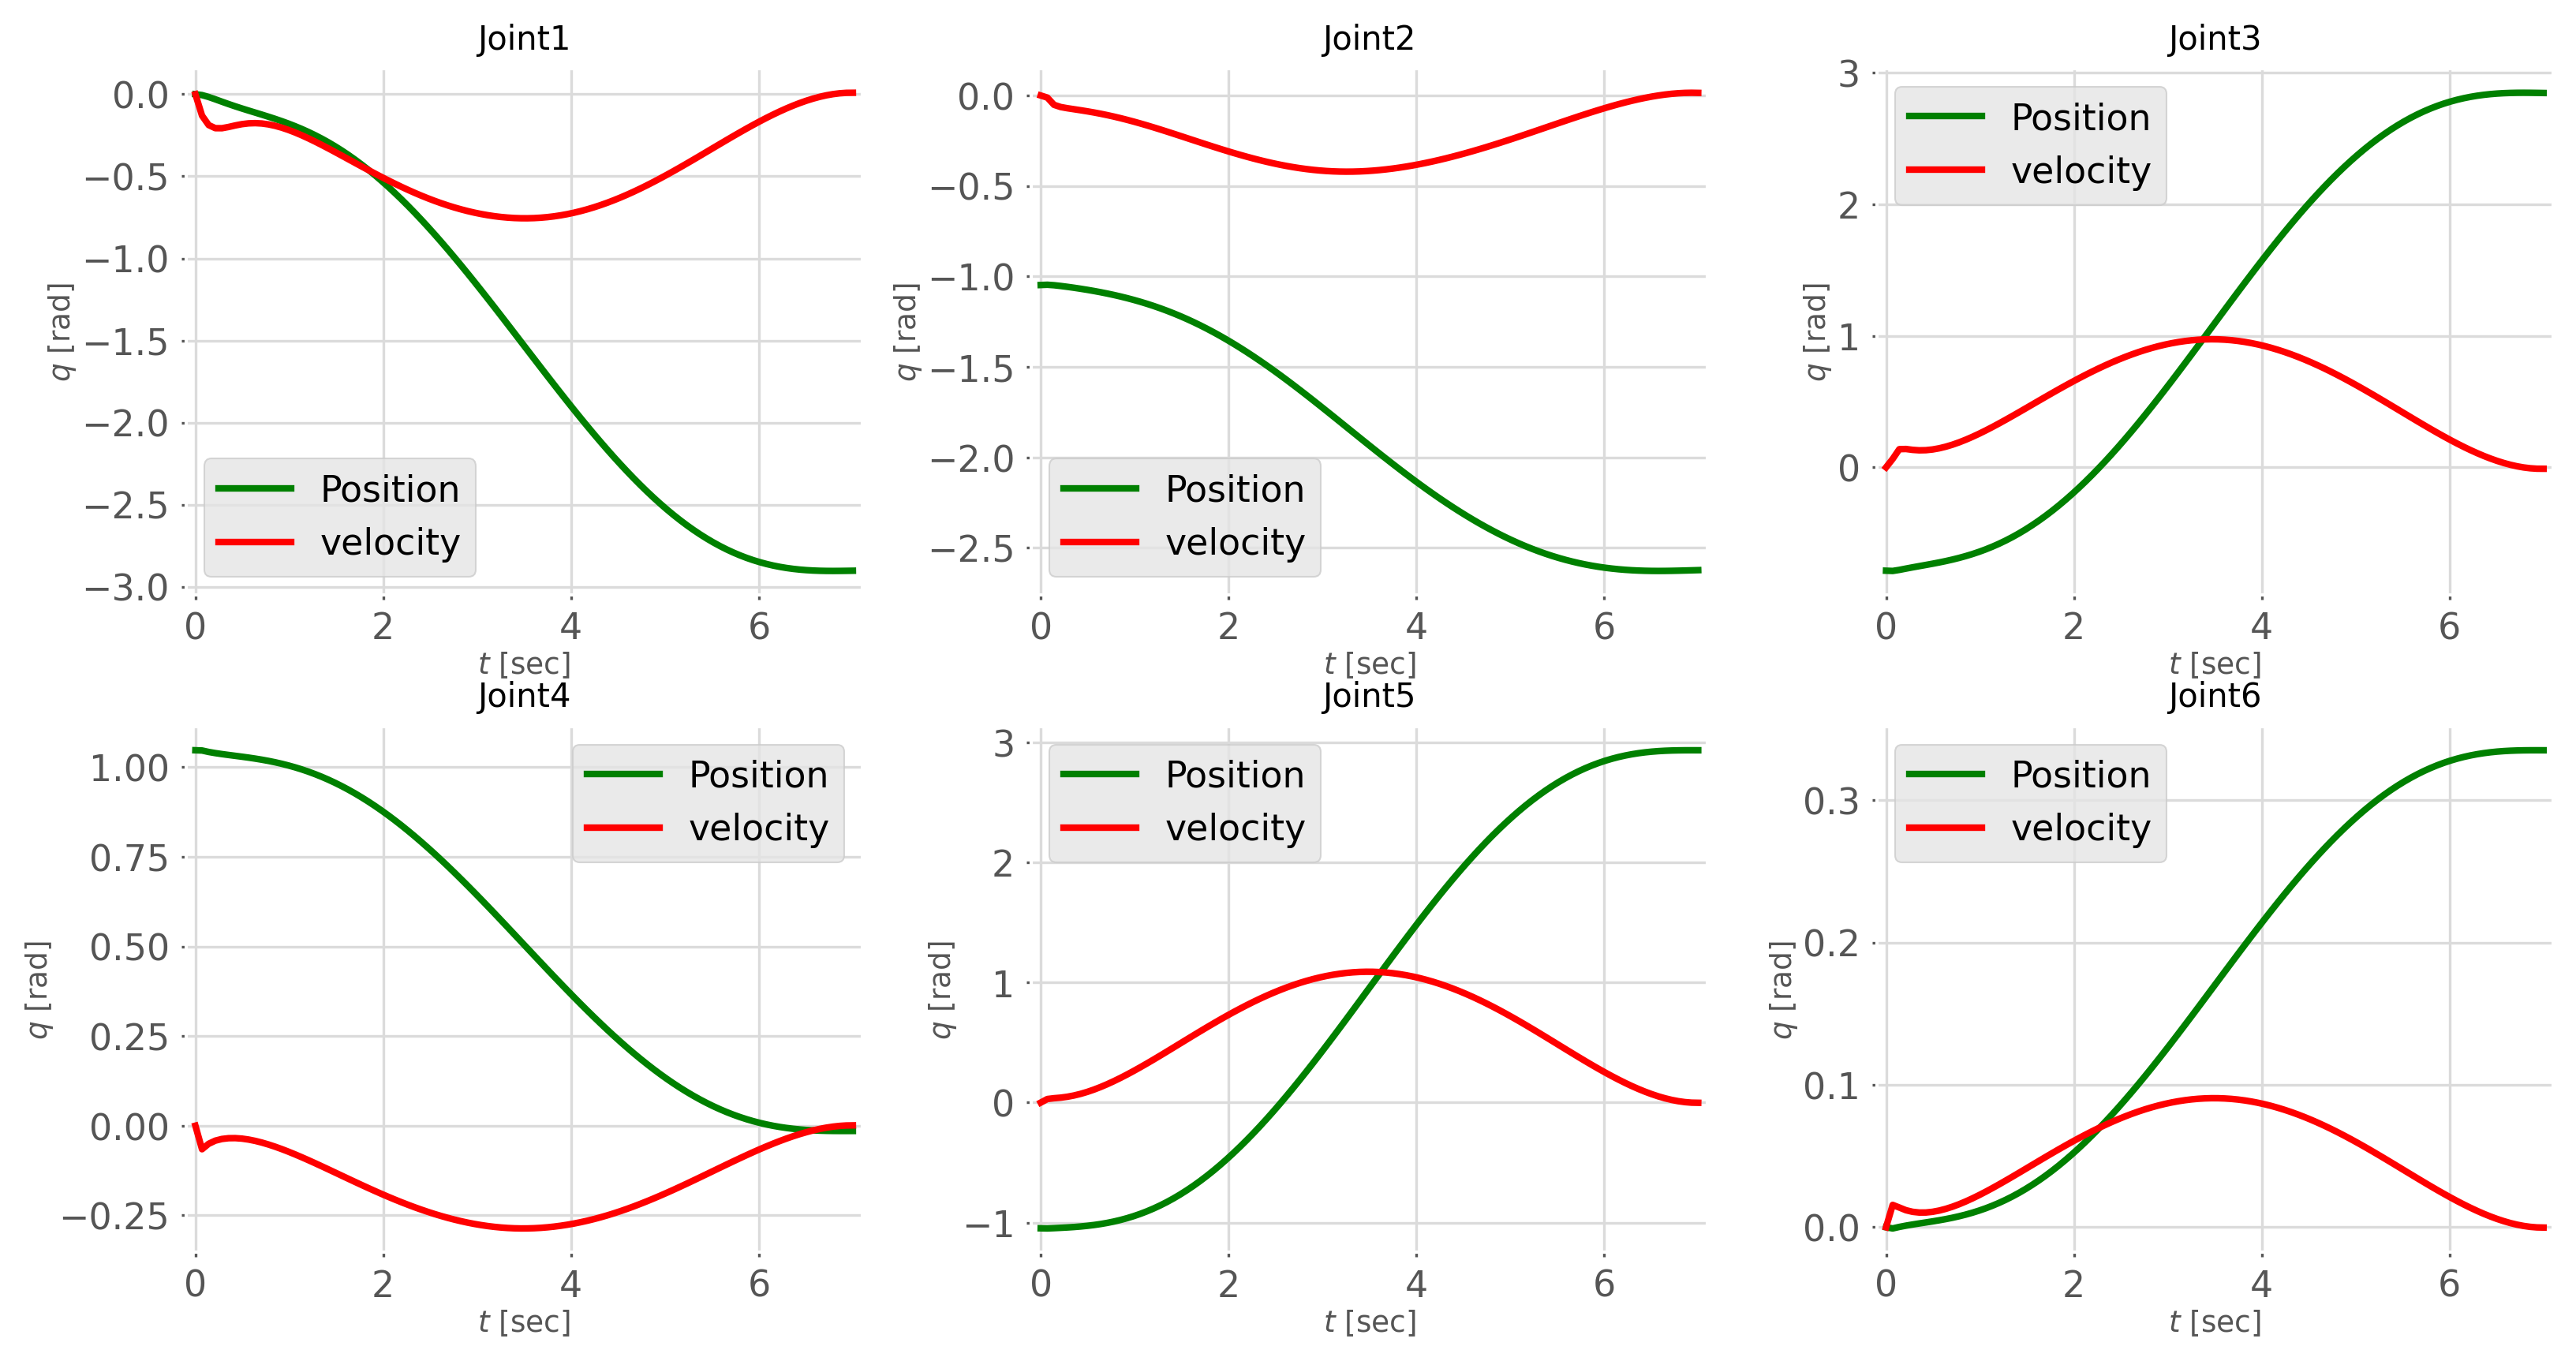

In [44]:
plt.figure(figsize=(10, 5), dpi=300)

for g in range(1, 7):  # Loop through joints 1 to 6
    plt.subplot(2, 3, g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)

    plt.plot(time, q_sim[:, g-1], linestyle='-', linewidth=2, color='green', label="Position")
    plt.plot(time, qd_sim[:, g-1], linestyle='-', linewidth=2, color='red', label="velocity")

    plt.title(f"Joint{g}", fontsize=10)
    plt.ylabel(r"$q$ [rad]", fontsize=9)
    plt.xlabel(r"$t$ [sec]", fontsize=9)
    plt.grid(True)
    plt.legend()
    plt.gca().set_facecolor((1, 1, 1))
    plt.xlim([t_start - 0.1, t_stop + 0.1])

#plt.suptitle("Simulated Joint Positions (q_sim)", fontsize=12)
plt.show()


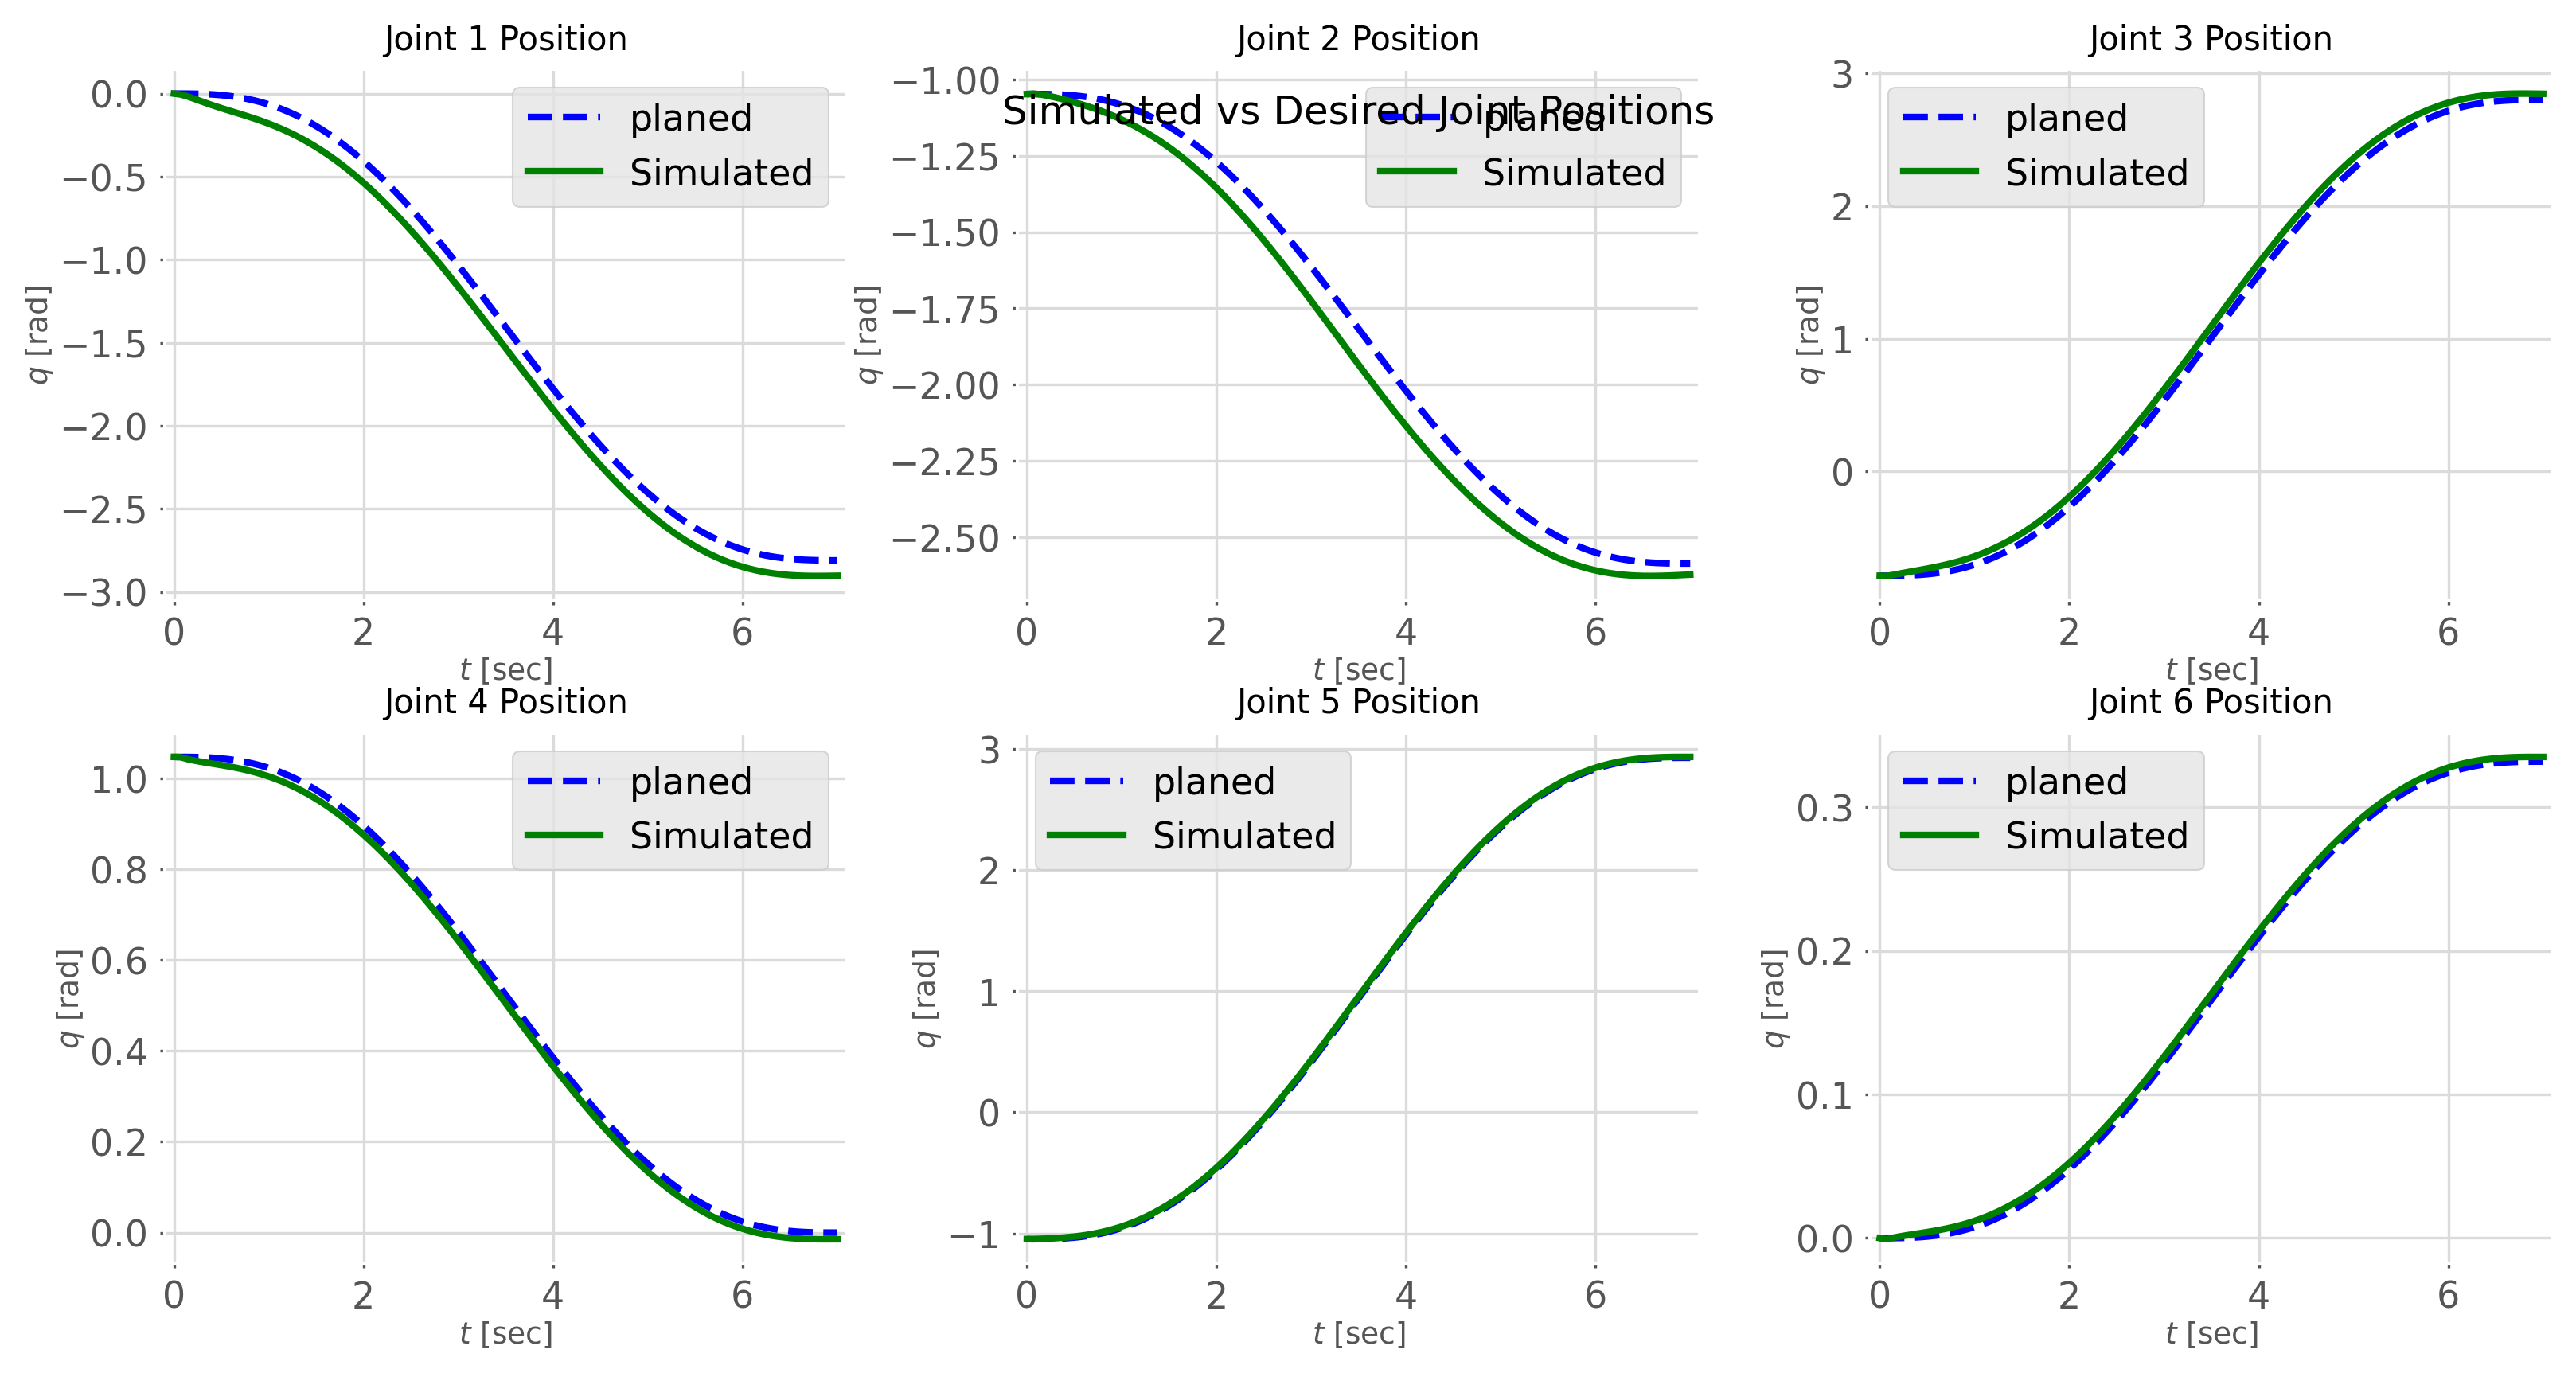

In [45]:
%matplotlib inline


plt.figure(figsize=(10, 5), dpi=300)

for g in range(1, 7):
    plt.subplot(2, 3, g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)

    # Desired and simulated
    q_desired = [trajectory.q[i][g-1] for i in range(len(trajectory.q))]
    q_actual = q_sim[:, g-1]

    plt.plot(time, q_desired, linestyle='--', linewidth=2, color='blue', label="planed")
    plt.plot(time, q_actual, linestyle='-', linewidth=2, color='green', label="Simulated")

    plt.title(f"Joint {g} Position", fontsize=10)
    plt.ylabel(r"$q$ [rad]", fontsize=9)
    plt.xlabel(r"$t$ [sec]", fontsize=9)
    plt.grid(True)
    plt.legend()
    plt.gca().set_facecolor((1, 1, 1))
    plt.xlim([t_start - 0.1, t_stop + 0.1])

plt.suptitle("Simulated vs Desired Joint Positions", fontsize=12)
plt.show()


Joint Error between planed vs simulated

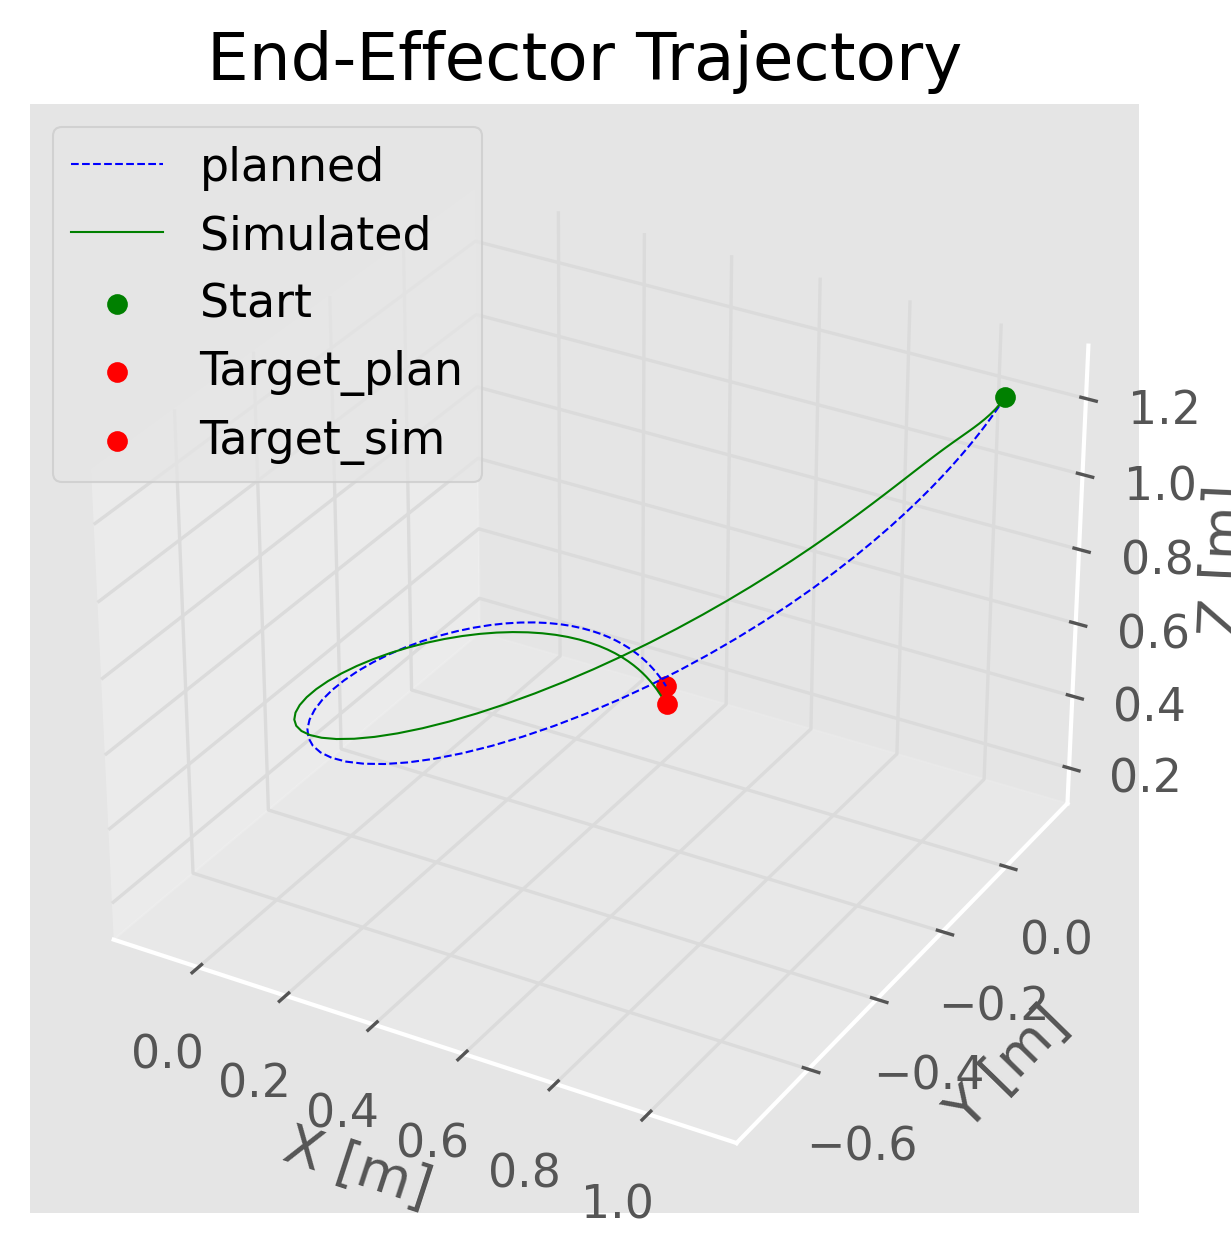

In [46]:
ee_positions_sim = np.array([robot.fkine(q).t for q in q_sim])
ee_positions_des = np.array([robot.fkine(q).t for q in trajectory.q])

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.plot(*ee_positions_des.T, 'b--', label='planned')
ax.plot(*ee_positions_sim.T, 'g-', label='Simulated')
ax.scatter(ee_positions[0, 0], ee_positions[0, 1], ee_positions[0, 2], c='green', label='Start')
ax.scatter(ee_positions[-1, 0], ee_positions[-1, 1], ee_positions[-1, 2], c='red', label='Target_plan')
ax.scatter(ee_sim_positions[-1, 0], ee_sim_positions[-1, 1], ee_sim_positions[-1, 2], c='red', label='Target_sim')
ax.set_title("End-Effector Trajectory")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
ax.legend()
plt.show()


In [47]:
errors = np.linalg.norm(ee_positions_des - ee_positions_sim, axis=1)
